### Extracting embeddings of movies by passing movie description and genres as inputs to AlBERT model. This method considers both movie description and genre as part of the returned embedding.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import os
from transformers import AlbertTokenizerFast
from transformers import TFAlbertModel, AlbertConfig
from tensorflow.keras.layers import Input, concatenate

In [3]:
data = pd.read_csv('movie_genre_multilabel_dataset.csv')

In [4]:
data

,overview,Drama,Documentary,Comedy,Animation,Romance,Thriller,Horror,Action,Music,Crime,Family,Adventure,TV Movie,Science Fiction,Fantasy,Mystery,History,War,Western
0,An exploratory dive into the deepest depths of...,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,Father Gabriele Amorth Chief Exorcist of the V...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
2,When a new threat capable of destroying the en...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
3,Super-Hero partners Scott Lang and Hope van Dy...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,After dominating the boxing world Adonis Creed...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435843,A hitman battles demons in a cabin in the woods.,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
435844,We follow the Journal reporter Paulo whose clo...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
435845,After his star actress Indre murders her mothe...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
435846,Pavlik is six years old. He spends a happy and...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(435848, 20)

In [6]:
data.dtypes

overview           object
Drama               int64
Documentary         int64
Comedy              int64
Animation           int64
Romance             int64
Thriller            int64
Horror              int64
Action              int64
Music               int64
Crime               int64
Family              int64
Adventure           int64
TV Movie            int64
Science Fiction     int64
Fantasy             int64
Mystery             int64
History             int64
War                 int64
Western             int64
dtype: object

In [7]:
for col in data.columns[1:]:
    data[col] = data[col].astype(np.int8)

In [8]:
data.dtypes

overview           object
Drama                int8
Documentary          int8
Comedy               int8
Animation            int8
Romance              int8
Thriller             int8
Horror               int8
Action               int8
Music                int8
Crime                int8
Family               int8
Adventure            int8
TV Movie             int8
Science Fiction      int8
Fantasy              int8
Mystery              int8
History              int8
War                  int8
Western              int8
dtype: object

In [9]:
data.dropna(inplace=True)

In [10]:
overview = data['overview'].to_list()
genre = data.drop(columns='overview').values.copy()

In [11]:
overview[:5]

['An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival.',
 "Father Gabriele Amorth Chief Exorcist of the Vatican investigates a young boy's terrifying possession and ends up uncovering a centuries-old conspiracy the Vatican has desperately tried to keep hidden.",
 'When a new threat capable of destroying the entire planet emerges Optimus Prime and the Autobots must team up with a powerful faction known as the Maximals. With the fate of humanity hanging in the balance humans Noah and Elena will do whatever it takes to help the Transformers as they engage in the ultimate battle to save Earth.',
 "Super-Hero partners Scott Lang and Hope van Dyne along with with Hope's parents Janet van Dyne and Hank Pym and Scott's daughter Cassie Lang find themselves exploring the Quantum Realm interacting with strange new creatures and embarki

In [12]:
genre

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int8)

In [14]:
model_checkpoint = "albert-base-v2"
tokenizer = AlbertTokenizerFast.from_pretrained(model_checkpoint)

In [15]:
print(overview[0])
print(tokenizer.tokenize(overview[0]))
print(tokenizer(overview[0]))

An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival.
['▁an', '▁', 'exp', 'lor', 'atory', '▁dive', '▁into', '▁the', '▁deepest', '▁depths', '▁of', '▁the', '▁ocean', '▁of', '▁a', '▁daring', '▁research', '▁team', '▁spiral', 's', '▁into', '▁chaos', '▁when', '▁a', '▁male', 'vol', 'ent', '▁mining', '▁operation', '▁threatens', '▁their', '▁mission', '▁and', '▁forces', '▁them', '▁into', '▁a', '▁high', '-', 's', 'take', 's', '▁battle', '▁for', '▁survival', '.']
{'input_ids': [2, 40, 13, 6899, 7386, 7496, 8523, 77, 14, 19944, 11898, 16, 14, 2144, 16, 21, 18121, 527, 173, 9789, 18, 77, 8205, 76, 21, 1379, 5847, 2291, 4243, 1453, 20266, 66, 1408, 17, 879, 105, 77, 21, 183, 8, 18, 4386, 18, 692, 26, 7108, 9, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
N_TOKENS = 150

In [17]:
overview_tokens = tokenizer(overview, max_length=N_TOKENS, padding="max_length", truncation=True, return_tensors="tf", return_attention_mask=True, return_token_type_ids=False)

In [18]:
overview_tokens[:5]

[Encoding(num_tokens=150, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=150, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=150, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=150, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=150, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])]

In [19]:
overview_tokens['genre'] = genre

In [21]:
# train_tf_data = tf.data.Dataset.from_tensor_slices((dict(train_tokens), y_train))
# test_tf_data = tf.data.Dataset.from_tensor_slices((dict(test_tokens), y_test))
# we are not training model, we don't need y_train and y_test
input_data = tf.data.Dataset.from_tensor_slices(dict(overview_tokens))

In [22]:
input_data = input_data.prefetch(tf.data.AUTOTUNE)

In [23]:
for i in input_data.take(1):
    print(i)

{'input_ids': <tf.Tensor: shape=(150,), dtype=int32, numpy=
array([    2,    40,    13,  6899,  7386,  7496,  8523,    77,    14,
       19944, 11898,    16,    14,  2144,    16,    21, 18121,   527,
         173,  9789,    18,    77,  8205,    76,    21,  1379,  5847,
        2291,  4243,  1453, 20266,    66,  1408,    17,   879,   105,
          77,    21,   183,     8,    18,  4386,    18,   692,    26,
        7108,     9,     3,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,   

In [24]:
config = AlbertConfig.from_pretrained(model_checkpoint, output_hidden_states=False)

19

In [29]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

model = TFAlbertModel.from_pretrained(model_checkpoint, config=config) # initializing AlBERT model
input_ids = Input(shape=(N_TOKENS,), dtype=tf.int32, name="input_ids") # input_ids 
attention_mask = Input(shape=(N_TOKENS,), dtype=tf.int32, name="attention_mask") # attention_mask
genre = Input(shape=(genre.shape[1],), dtype=tf.float64, name="genre") # genre
x = model([input_ids, attention_mask])[0][:,0,:] # [CLS] token of last hidden state
output = concatenate([x, genre], axis=1) # concatenating [CLS] embedding with one hot encoded genre
model = tf.keras.Model(inputs=[input_ids, attention_mask, genre], outputs=[output])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [30]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 150)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 150)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_albert_model_1 (TFAlber  TFBaseModelOutputWithPooli   1168358   ['input_ids[0][0]',           
 tModel)                     ng(last_hidden_state=(None   4          'attention_mask[0][0]']      
                             , 150, 768),                                                   

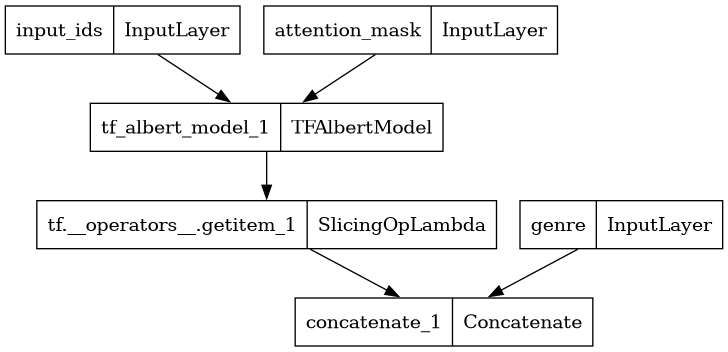

In [31]:
tf.keras.utils.plot_model(model)

In [32]:
inf_df = pd.read_csv('movie_genre_multilabel_dataset.csv', nrows=10)

In [33]:
inf_x = inf_df['overview'].to_list()
inf_genre = inf_df.drop(columns=['overview']).values

In [34]:
inf_x[0], inf_genre[0]

('An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival.',
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]))

In [35]:
text = inf_x
genre = inf_genre
model_checkpoint = "albert-base-v2"
tokenizer = AlbertTokenizerFast.from_pretrained(model_checkpoint)
tokenized_txt = tokenizer(text, max_length=150, padding="max_length", truncation=True, return_tensors="tf", return_token_type_ids=False)
tokenized_txt['genre'] = tf.convert_to_tensor(genre.reshape(len(genre),-1))

In [36]:
tokenized_txt

{'input_ids': <tf.Tensor: shape=(10, 150), dtype=int32, numpy=
array([[   2,   40,   13, ...,    0,    0,    0],
       [   2,  321, 4337, ...,    0,    0,    0],
       [   2,   76,   21, ...,    0,    0,    0],
       ...,
       [   2,   75,   21, ...,    0,    0,    0],
       [   2,   75,  302, ...,    0,    0,    0],
       [   2, 4679,   17, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(10, 150), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>, 'genre': <tf.Tensor: shape=(10, 19), dtype=int64, numpy=
array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 

In [38]:
input_ = tf.data.Dataset.from_tensor_slices((dict(tokenized_txt)))
embs = model([tokenized_txt['input_ids'], tokenized_txt['attention_mask'], tokenized_txt['genre']])

In [39]:
embs[0] # shape is 787 as text embeddings=768 + one hot encoded genre=19. 768+19=787

<tf.Tensor: shape=(787,), dtype=float32, numpy=
array([ 4.94774878e-01, -3.33010823e-01,  1.21681845e+00, -4.43037331e-01,
       -6.74777552e-02, -9.23058450e-01,  4.40657973e-01, -2.59136736e-01,
        3.91990989e-01,  8.94516349e-01,  7.78596401e-01,  2.25549251e-01,
        1.05915689e+00,  1.04549026e+00,  8.33363831e-01,  3.91762078e-01,
       -6.51061893e-01, -7.44729161e-01,  7.59672582e-01, -3.01921248e-01,
        1.27027020e-01, -1.35083580e+00, -1.18924034e+00, -6.23004794e-01,
        1.29705870e+00, -4.31540489e-01,  5.34226358e-01, -8.11375320e-01,
        1.97703505e+00, -1.54280663e+00, -9.77934361e-01,  2.41909814e+00,
        1.58856785e+00, -1.21626705e-01,  2.44556427e+00, -2.64270854e+00,
        8.65328729e-01, -5.69369644e-03,  1.26505482e+00, -1.18416190e+00,
        1.34900928e+00,  3.23272616e-01, -7.43744671e-01, -1.71105325e+00,
        8.58915448e-01,  1.29542840e+00, -1.31789589e+00,  6.61533058e-01,
        7.72390306e-01,  1.44701159e+00, -6.28455758